<a href="https://colab.research.google.com/github/ErnandoRizkiD/TugasSLO/blob/main/Ernando_Rizki_D_2101202071_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [72]:
ls

 3scene@                        'TugasSLO_2201202071_Ernando Rizki D.ipynb'
 classify_iris_ANN.ipynb         Untitled0.ipynb
'Salinan dari Untitled1.ipynb'   UTS.ipynb


In [73]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageFilter
from imutils import paths
import numpy as np
import os

In [96]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [97]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 #bisa pasang preprocessing disini jika mau, seperti filterring, dll
	image = np.array(image.resize((32,32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [76]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [98]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [78]:
print (labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [79]:
print(np.array(data).shape)

(948, 32, 32, 3)


In [99]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.18)
print(trainX.shape)
print(testX.shape)

(777, 32, 32, 3)
(171, 32, 32, 3)


In [100]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

model = Sequential(
    [
        Flatten(input_shape=(32*32*3,)),
     Dense(512, activation="relu"),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(3, activation = "softmax"),
    ]
)

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_71 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_73 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)              

In [102]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

[INFO] training network...
Epoch 1/50
25/25 [==============================] - 1s 16ms/step - loss: 1.1860 - accuracy: 0.3751 - val_loss: 1.1113 - val_accuracy: 0.2281
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1160 - accuracy: 0.3664 - val_loss: 1.0768 - val_accuracy: 0.4269
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1338 - accuracy: 0.3481 - val_loss: 1.0718 - val_accuracy: 0.3860
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0815 - accuracy: 0.3982 - val_loss: 1.0820 - val_accuracy: 0.4211
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0751 - accuracy: 0.3800 - val_loss: 1.0153 - val_accuracy: 0.3684
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0299 - accuracy: 0.4060 - val_loss: 0.9749 - val_accuracy: 0.4094
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 1.0200 - accuracy: 0.3838 - val_loss: 0.9392 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


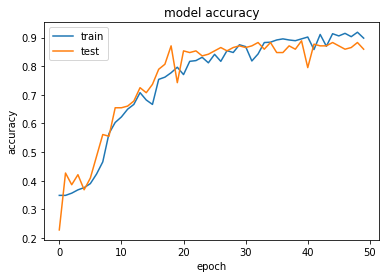

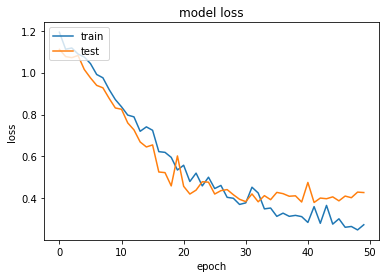

In [103]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.81      0.93      0.87        73
      forest       0.94      0.85      0.89        59
     highway       0.85      0.74      0.79        39

    accuracy                           0.86       171
   macro avg       0.87      0.84      0.85       171
weighted avg       0.87      0.86      0.86       171

